# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file [pizza_delivery_locations.csv](https://drive.google.com/file/d/1tSpqC5sM7DegMil4D9U3DN9exYNATpiA/view?usp=sharing) is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. Download the file and update the path below.

In [2]:
data_file = "../datasets/pizza_delivery_locations.csv"

In [28]:
data = pd.read_csv(data_file)
pd_dat = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


In [41]:
pd_dat['LatitudeLong'] = pd_dat['Latitude']*1000
pd_dat['LongitudeLong'] = pd_dat['Longitude']*1000

## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can use the `sklearn.KMeans` module to perform clustering.

In [4]:
import random
from math import sqrt

def manhattan(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        res+=abs(v1[i]-v2[i])

    return res


def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return sqrt(float(res))


def cosine(v1,v2):
    dotproduct=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        dotproduct+=v1[i]*v2[i]

    v1len=0
    v2len=0
    for i in range (dimensions):
        v1len+=v1[i]*v1[i]
        v2len+=v2[i]*v2[i]

    v1len=sqrt(v1len)
    v2len=sqrt(v2len)
    
    # we need distance here - 
    # we convert cosine similarity into distance
    return 1.0-(float(dotproduct)/(v1len*v2len))
  

def pearson(v1,v2):
    # Simple sums
    sum1=sum(v1)
    sum2=sum(v2)
  
    # Sums of the squares
    sum1Sq=sum([pow(v,2) for v in v1])
    sum2Sq=sum([pow(v,2) for v in v2])
  
    # Sum of the products
    pSum=sum([v1[i]*v2[i] for i in range(min(len(v1),len(v2)))])
  
    # Calculate r (Pearson score)
    numerator=pSum-(sum1*sum2/len(v1))
    denominator=sqrt((sum1Sq-pow(sum1,2)/len(v1))*(sum2Sq-pow(sum2,2)/len(v1)))
    if denominator==0: return 1.0
    
    # we need distance here - 
    # we convert pearson correlation into distance
    return 1.0-numerator/denominator


def tanimoto(v1,v2):
    c1,c2,shared=0,0,0

    for i in range(len(v1)):
        if v1[i]!=0 or v2[i]!= 0:
            if v1[i]!=0: c1+=1 # in v1
            if v2[i]!=0: c2+=1 # in v2
            if v1[i]!=0 and v2[i]!=0: shared+=1 # in both
    
    # we need distance here - 
    # we convert tanimoto similarity into distance
    return 1.0-(float(shared)/(c1+c2-shared))

# k-means clustering
def kcluster(rows,distance=euclidean,k=4):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                            for i in range(len(rows[0]))] for j in range(k)]
  
    lastmatches=None
    bestmatches = None

    for t in range(100):
        print ('Iteration %d' % t)
        bestmatches=[[] for i in range(k)]
    
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row=rows[j]
            bestmatch=0
            for i in range(k):
                d=distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch=i
            bestmatches[bestmatch].append(j)

        # If the results are the same as last time, this is complete
        if bestmatches==lastmatches: break
        lastmatches=bestmatches
    
        # Move the centroids to the average of the cluster members
        for i in range(k):
            avgs=[0.0]*len(rows[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m]+=rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j]/=len(bestmatches[i])
                clusters[i]=avgs
      
    return bestmatches

In [15]:
# clustering code for 2,3 and 4 clusters
K = 2
distance = euclidean
K2 = kcluster(data, distance,K)
K3 = kcluster(data, distance,K+1)
K4 = kcluster(data, distance,K+2)

Iteration 0
Iteration 1
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 0
Iteration 1


In [66]:
pd_dat['K2'] = 0 
pd_dat = pd_dat.assign(K2 = 1, index = K2[1])

ValueError: Length of values (34) does not match length of index (1301)

In [69]:
len(K2[1])

34

In [25]:
# Extracting best store locations for each cluster of addresses
# For each cluster, just find the centroid
# The things in these arrays arre the IDs of rows that belong to that cluster
def find_mean(rows, val = 0):
    tot = 0
    count = len(rows)
    for row in rows:
        tot+=row[val]
        
    return tot / count

        
    
def find_centroid(ids):
    mean_lat = find_mean(data[ids], 0)
    mean_long = find_mean(data[ids], 1)
    return [mean_lat, mean_long]

def gen_centroids(clusters):
    ret = []
    for cluster in clusters:
        ret.append(find_centroid(cluster))
    return ret

K2_locs = gen_centroids(K2)
K3_locs = gen_centroids(K3)
K4_locs = gen_centroids(K4)

print(K2_locs, K3_locs, K4_locs)

[[43.64674992107355, -116.24003388397858], [43.72387899999997, -116.25504600000009]] [[43.72387899999997, -116.25504600000009], [43.63727286046531, -116.22524744798069], [43.663956051111185, -116.2668794800005]] [[43.72387899999997, -116.25504600000009], [43.663956051111185, -116.2668794800005], [43.656688679611655, -116.21034185436882], [43.634471978991975, -116.22739769467776]]


## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

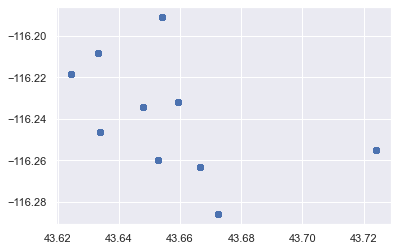

In [58]:
plt.scatter('Latitude', 'Longitude', data=pd_dat)
plt.show()

In [64]:
sns.relplot(
    data=pd_dat,
    y="Longitude", x="Latitude", col = K2[0]
)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 1301 and the vector passed to `col` has length 1267.

In [46]:
def get_vals(dat, col):
    ret = []
    for row in dat:
        ret.append(row[col])
    return ret

X = get_vals(data,0)
Y = get_vals(data,1)

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2022 Marina Barsky. All rights reserved.